In [1]:
%autosave 120
import numpy as np
import pandas as pd
%run -i 'NYTimesV16.py'

Autosaving every 120 seconds


In [2]:
%run -i 'Input_Text.py'

Text(value='')

Keyword:  Trump
Keyword:  protest


In [11]:
word = str(text.value).lower()
csv ='NYTimesTwo.csv'
NYTimes2 = pd.read_csv(csv, usecols=[0,1,2])
NYTimes = NYTimes2.apply(lambda x: x.astype(str).str.lower())
NYTimes = NYTimes.set_index('Headline')
NYTimes = NYTimes.drop('\n', axis=0)
NYTimes = NYTimes.reset_index()
NYTimes3 = NYTimes[NYTimes['Headline'].str.contains(word)]
NYTimes3


,Headline,Date_Time,Date
8,protests put hong kong on collision course wit...,44:07.3,8/12/19
67,"bolivias leader, facing protests over disputed...",51:19.4,11/10/19
120,senate passes bill to support hong kong protes...,43:29.5,11/19/19
121,parents of besieged hong kong protesters come ...,43:29.5,11/19/19
138,"hong kong protest, largest in weeks, stretches...",2019-12-08 11:52:53.027029,12/08/19
139,we are fleeing the law: hong kong protesters e...,2019-12-08 11:52:53.027029,12/08/19
167,other protests flare and fade. this movement a...,2020-06-08 09:53:37.677954,06/08/20


In [12]:
NYTimes['Headline'].drop_duplicates(
                     keep = 'first', inplace = True) 

result = [NYTimes['Headline'].str.contains(pat = word),['Date']]
total = NYTimes['Headline'].count()
Numword = sum(result[0])
Nonword = total-Numword
percent = round((Numword/total)*100,2)

CountArray = np.array(NYTimes)
#Seri = pd.Series(NYTimes)
#Freq = Seri.value_counts()
#pd.Series(1, index=result).resample('Date', how='count')

#counts = np.unique('Date')

print('\n',"Number of "+word+ " Stories: ",Numword,
      '\n',"Number of Non-" +word+ " Stories: ", Nonword, 
      '\n' " Percent of "+word+ " Stories: ", percent,"%"
     )#,'\n', CountArray)


 Number of protest Stories:  7 
 Number of Non-protest Stories:  180 
 Percent of protest Stories:  3.74 %


- Multiple inputs
- Automate pull from NYTimes (check bookmarks advanced jupyter notebook...domino?)
- Add Fox
- Look in to creating a server with a pi
- Show how many stories pper day, how many today, create a whole dashboard
- after automating with jupyter lab maybe jusst pull the file to tableau and publish

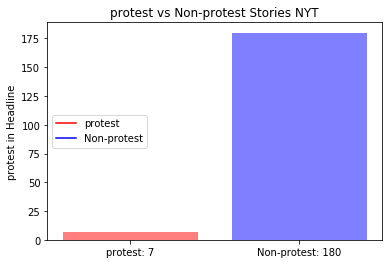

In [13]:
import numpy as np
import matplotlib.pyplot as plt

objects = (Numword, Nonword)
y_pos = np.arange(len(objects))
performance = [Numword, Nonword]
labels = [word,'Non-'+word]
wordlabel = str(performance[0])
nonwordlabel = str(performance[1])
labels2 = [word+': '+ wordlabel, 'Non-'+ word+': '+nonwordlabel]



plt.plot(performance[0], label=word, color='r')
plt.plot(performance[1], label='Non-'+word, color='b')
plt.bar( y_pos, performance, align='center', alpha=0.5,color = ('r','b'))
plt.xticks(y_pos, labels2)
plt.ylabel(word+ ' in Headline')
plt.title(word+ ' vs Non-'+word+' Stories NYT')
plt.legend()

plt.show()



- Create line graph with dates



In [9]:
import matplotlib.dates as dates

date_time = NYTimes['Date'].apply(dates.datestr2num(NYTimes['Date']))
#date_time = NYTimes.apply(pd.to_datetime(date_time))
temp = [NYTimes['Headline'].str.contains(pat = word)]

DF = pd.DataFrame()
DF['temp'] = temp
DF = DF.set_index(date_time)

fig, ax = plt.subplots()
#fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF)

TypeError: 'numpy.ndarray' object is not callable

ValueError: x and y must have same first dimension, but have shapes (70,) and (2,)

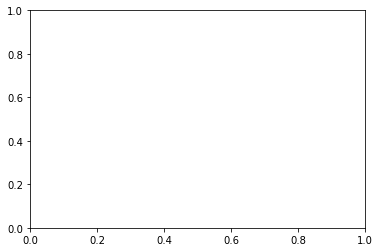

In [145]:
plt.plot(NYTimes3['Date'],NYTimes.count())

In [10]:
NYTimes.time = pd.to_datetime(NYTimes['Date'])#, format='%Y-%m-%d %H:%M:%S.%f')
NYTimes.set_index(['Date'],inplace=True)
NYTimes.plot()

Input_Text.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  #!/usr/bin/env python3


TypeError: no numeric data to plot